<a href="https://colab.research.google.com/github/Pavel184/Machine_vision/blob/Homework_lesson_1/Homework_lesson_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework_lesson_1

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import imageio
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from skimage.color import rgb2hsv, hsv2rgb
import scipy.signal

## Загрузка цветного изображения

In [2]:
img = imageio.imread('/content/pict.jpg')
print(img.shape)

(480, 640, 3)


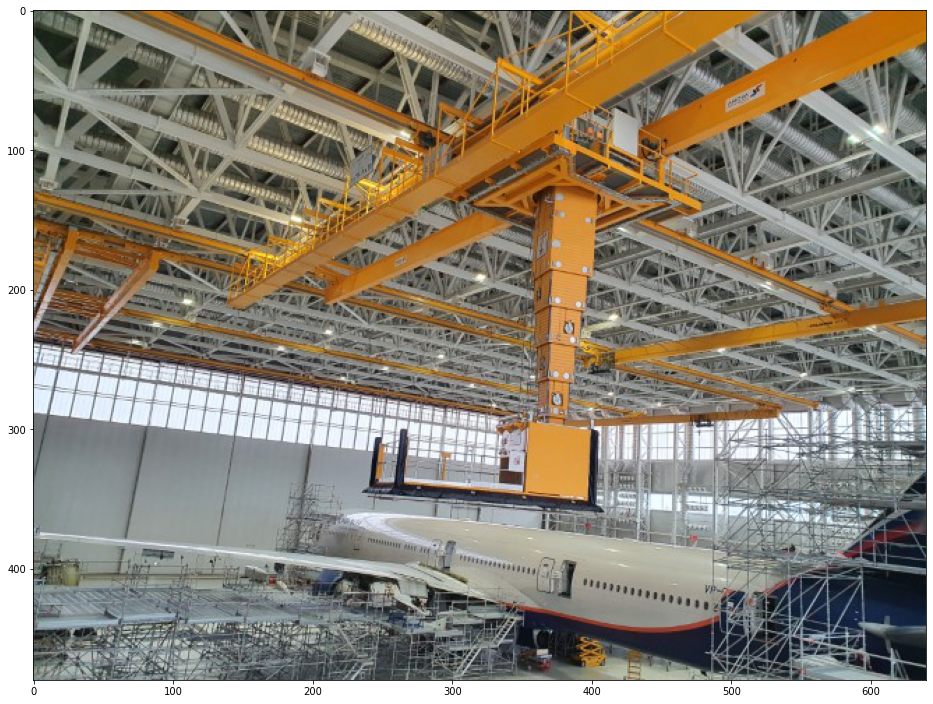

In [3]:
plt.figure(figsize=(16, 16))
plt.imshow(img)

In [4]:
win_size = (11, 11)
w = np.ones(win_size, dtype=np.float32)
w = w / np.sum(w)

In [5]:
def img_processing(img, w):
  img_hsv = rgb2hsv(img) # перевод изображения в HSV
  img_hsv_new = np.copy(img_hsv) # создание копии для дальнейшей обработки
  img_hsv_new[:, :, 2] = 1 - img_hsv_new[:, :, 1] # "инверсия" H
  img_hsv_new = hsv2rgb(img_hsv_new) # перевод изображения обратно в RGB

  # свёртка изображения с помощью библиотеки scipy
  img_conv = img.astype(np.float32) / 255
  out_img = []
  for c in range(3):
    out_img.append(scipy.signal.convolve2d(img_conv[:,:,c], w, mode='valid'))
  out_img = np.stack(out_img, axis=2)

  # Преобразование Лапласа(выявление границ переходов)
  laplacian_filter = np.zeros (img.shape)
  M = np.array([
      [-1, -1, -1], 
      [-1,  8, -1], 
      [-1, -1, -1]
  ])
  for row in range(1, img.shape[0] - 1):
      for col in range(1, img.shape[1] - 1):
          value = M * img[(row - 1):(row + 2), (col - 1):(col + 2)]
          laplacian_filter[row, col] = min(255, max(0, value.sum ()))
  return img_hsv_new, out_img, laplacian_filter

In [6]:
img_hsv_new, out_img, laplacian_filter = img_processing(img, w)

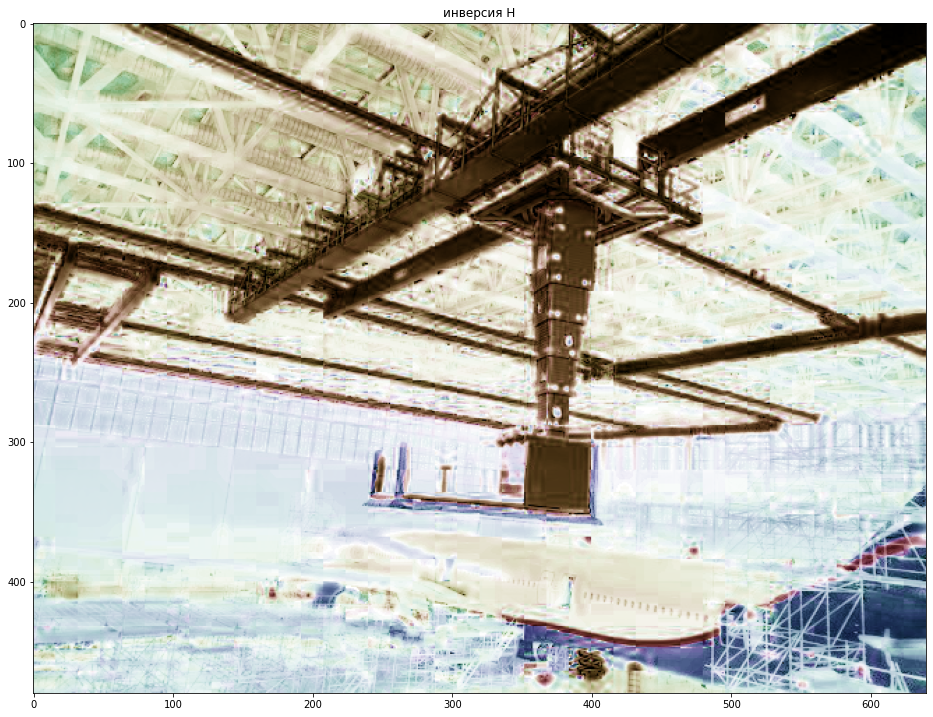

In [7]:
plt.figure(figsize=(16, 16))
plt.title("инверсия H")
plt.imshow(img_hsv_new)

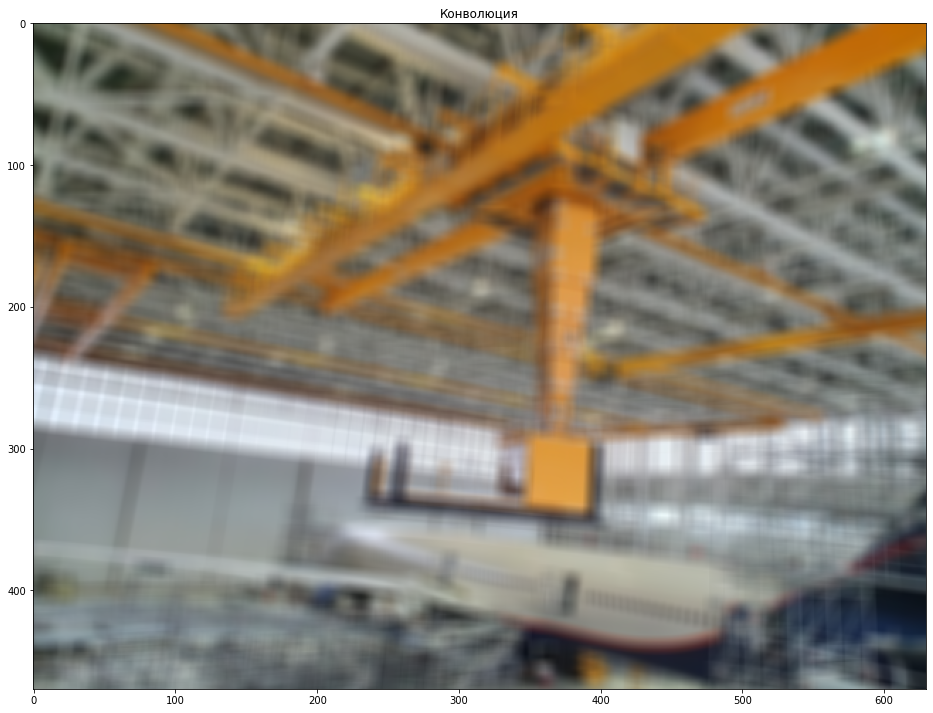

In [8]:
plt.figure(figsize=(16, 16))
plt.title("Конволюция")
plt.imshow(out_img)

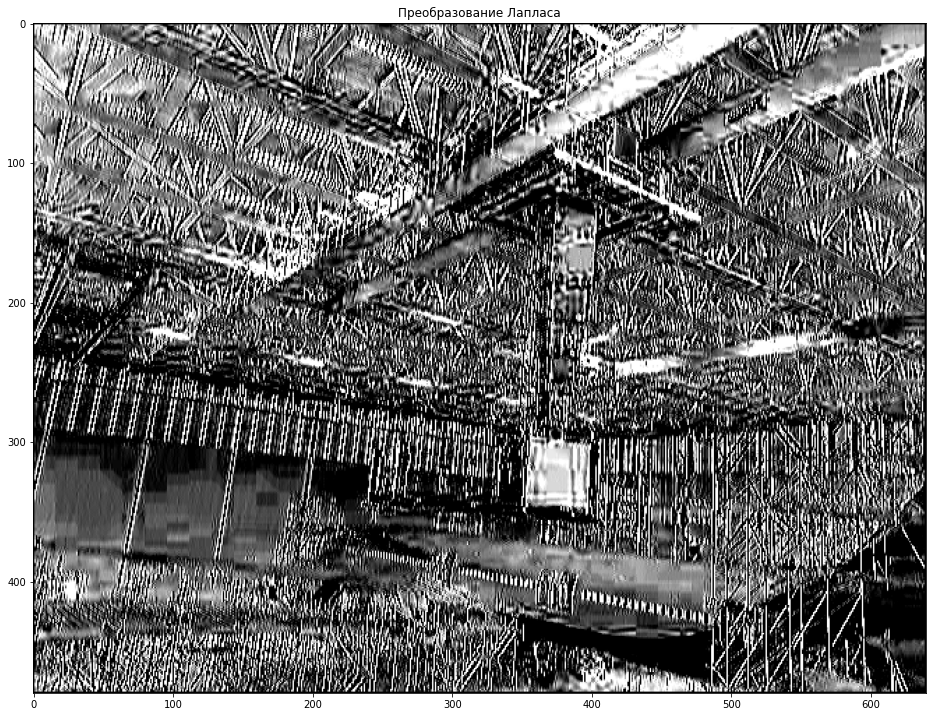

In [9]:
plt.figure(figsize=(16, 16))
plt.title("Преобразование Лапласа")
plt.imshow(laplacian_filter.astype('uint8'))